<a href="https://colab.research.google.com/github/ttevhide/Women_In_Tech/blob/main/Scottish%20uni%20subject%20enrolment%2020219-2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import janitor
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

url= "https://github.com/ttevhide/Women_In_Tech/blob/main/DataSet/figure-13.csv?raw=true"
df=pd.read_csv(url,header=15)
display(df.info())
display(df)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69354 entries, 0 to 69353
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CAH level 1             69354 non-null  object 
 1   First year marker       69354 non-null  object 
 2   Level of study          69354 non-null  object 
 3   Mode of study           69354 non-null  object 
 4   Country of HE provider  69354 non-null  object 
 5   Sex                     69354 non-null  object 
 6   Academic Year           69354 non-null  object 
 7   Number                  68966 non-null  float64
dtypes: float64(1), object(7)
memory usage: 4.2+ MB


None

,CAH level 1,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610.0
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605.0
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150.0
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370.0
4,01 Medicine and dentistry,All,All,All,All,Female,2020/21,47435.0
...,...,...,...,...,...,...,...,...
69349,Total,Other years,All undergraduate,Part-time,Wales,Female,2020/21,7105.0
69350,Total,Other years,All undergraduate,Part-time,Wales,Male,2020/21,4860.0
69351,Total,Other years,All undergraduate,Part-time,Wales,Other,2020/21,10.0
69352,Total,Other years,All undergraduate,Part-time,Wales,Not known,2020/21,0.0



**Subject enrolments at Scottish Universities in 2020/2021**

Investigating Undergraduate & Postgraduate, full-time & part-time courses at Scottish Universities in 2020/2021. There will be a focus on female enrolment in Computing subjects compared to other subjects at the different levels and modes.
Data was obtained from HESA and a copy is uploaded to GitHub.






In [18]:
# View unique values in each column to see what can be filtered
print(df["CAH level 1"].unique())
print(df["First year marker"].unique())
print(df["Level of study"].unique())
print(df["Mode of study"].unique())
print(df["Country of HE provider"].unique())

['01 Medicine and dentistry' '02 Subjects allied to medicine'
 '03 Biological and sport sciences' '04 Psychology'
 '05 Veterinary sciences' '06 Agriculture, food and related studies'
 '07 Physical sciences' '09 Mathematical sciences'
 '10 Engineering and technology' '11 Computing'
 '13 Architecture, building and planning'
 '26 Geography, earth and environmental studies (natural sciences)'
 'Total science CAH level 1' '15 Social sciences' '16 Law'
 '17 Business and management' '19 Language and area studies'
 '20 Historical, philosophical and religious studies'
 '22 Education and teaching' '23 Combined and general studies'
 '24 Media, journalism and communications'
 '25 Design, and creative and performing arts'
 '26 Geography, earth and environmental studies (social sciences)'
 'Total non-science CAH level 1' 'Total']
['All' 'First year' 'Other years']
['All' 'Postgraduate (research)' 'Postgraduate (taught)'
 'All postgraduate' 'First degree' 'Other undergraduate'
 'All undergraduate']
[

In [20]:
df_clean = df.clean_names()
df_clean


,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610.0
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605.0
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150.0
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370.0
4,01 Medicine and dentistry,All,All,All,All,Female,2020/21,47435.0
...,...,...,...,...,...,...,...,...
69349,Total,Other years,All undergraduate,Part-time,Wales,Female,2020/21,7105.0
69350,Total,Other years,All undergraduate,Part-time,Wales,Male,2020/21,4860.0
69351,Total,Other years,All undergraduate,Part-time,Wales,Other,2020/21,10.0
69352,Total,Other years,All undergraduate,Part-time,Wales,Not known,2020/21,0.0


In [22]:
# Drop total rows (Total - Science subject areas, Total - Non-science subject areas, Total)
df_clean = df_clean[(df_clean["cah_level_1"] != "Total") 
                                & (df_clean["cah_level_1"] != "Total science CAH level 1")
                                & (df_clean["cah_level_1"] != "Total non-science CAH level 1")
                                & (df_clean["cah_level_1"] != "Combined and general studies")].copy()
df_clean            

,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
0,01 Medicine and dentistry,All,All,All,All,Female,2019/20,42610.0
1,01 Medicine and dentistry,All,All,All,All,Male,2019/20,27605.0
2,01 Medicine and dentistry,All,All,All,All,Other,2019/20,150.0
3,01 Medicine and dentistry,All,All,All,All,Total,2019/20,70370.0
4,01 Medicine and dentistry,All,All,All,All,Female,2020/21,47435.0
...,...,...,...,...,...,...,...,...
63679,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Female,2020/21,5.0
63680,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Male,2020/21,5.0
63681,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Other,2020/21,0.0
63682,"26 Geography, earth and environmental studies ...",Other years,All undergraduate,Part-time,Wales,Not known,2020/21,0.0


In [23]:
# Remove the brackets and number/letter at the start of the Subject Area values
df_clean["cah_level_1"] = df_clean["cah_level_1"].str[3:]
subjects= df_clean["cah_level_1"].unique()
print(df_clean["cah_level_1"].unique())

['Medicine and dentistry' 'Subjects allied to medicine'
 'Biological and sport sciences' 'Psychology' 'Veterinary sciences'
 'Agriculture, food and related studies' 'Physical sciences'
 'Mathematical sciences' 'Engineering and technology' 'Computing'
 'Architecture, building and planning'
 'Geography, earth and environmental studies (natural sciences)'
 'Social sciences' 'Law' 'Business and management'
 'Language and area studies'
 'Historical, philosophical and religious studies'
 'Education and teaching' 'Combined and general studies'
 'Media, journalism and communications'
 'Design, and creative and performing arts'
 'Geography, earth and environmental studies (social sciences)']


**Enrolment in full-time undergraduate subjects at Scottish Universities in 2020-2021**

In [39]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ft_ug_scotland = df_clean[(df_clean["first_year_marker"] == "First year")
                     & (df_clean["country_of_he_provider"] == "Scotland")
                     & (df_clean["level_of_study"] == "All undergraduate")
                     & (df_clean["mode_of_study"] == "Full-time")].copy()
ft_ug_scotland                    

,cah_level_1,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
2511,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Female,2019/20,1015.0
2512,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Male,2019/20,520.0
2513,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Other,2019/20,0.0
2514,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Total,2019/20,1535.0
2515,Medicine and dentistry,First year,All undergraduate,Full-time,Scotland,Female,2020/21,1090.0
...,...,...,...,...,...,...,...,...
63508,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Female,2020/21,175.0
63509,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Male,2020/21,70.0
63510,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Other,2020/21,0.0
63511,"Geography, earth and environmental studies (so...",First year,All undergraduate,Full-time,Scotland,Not known,2020/21,0.0


In [27]:
# Full time, Under Graduate subjects
pivot = pd.pivot_table(ft_ug_scotland, values="number", index="cah_level_1", columns="sex").reset_index()
pivot.sort_values(by="Female", ascending=False, inplace=True)

# Percentage of female
pivot["% Female"] = round((pivot["Female"] / pivot["Total"]) * 100, 2)
pivot.sort_values(by="% Female", ascending=False, inplace=True)

# Add color gradient
cm = sns.diverging_palette(20, 235, n=100, center="light", as_cmap=True)
pivot.style.background_gradient(cmap=cm, subset=["% Female"])

sex,cah_level_1,Female,Male,Not known,Other,Total,% Female
21,Veterinary sciences,370.000000,57.500000,0.000000,0.000000,425.000000,87.060000
7,Education and teaching,1062.500000,200.000000,0.000000,0.000000,1265.000000,83.990000
20,Subjects allied to medicine,5870.000000,1142.500000,0.000000,5.000000,7012.500000,83.710000
18,Psychology,1512.500000,375.000000,0.000000,5.000000,1892.500000,79.920000
12,Language and area studies,1620.000000,535.000000,0.000000,7.500000,2160.000000,75.000000
19,Social sciences,3412.500000,1545.000000,0.000000,7.500000,4967.500000,68.700000
10,"Geography, earth and environmental studies (social sciences)",155.000000,77.500000,0.000000,0.000000,232.500000,66.670000
13,Law,1225.000000,630.000000,0.000000,0.000000,1857.500000,65.950000
6,"Design, and creative and performing arts",2037.500000,1065.000000,0.000000,20.000000,3125.000000,65.200000
16,Medicine and dentistry,1052.500000,562.500000,0.000000,0.000000,1615.000000,65.170000


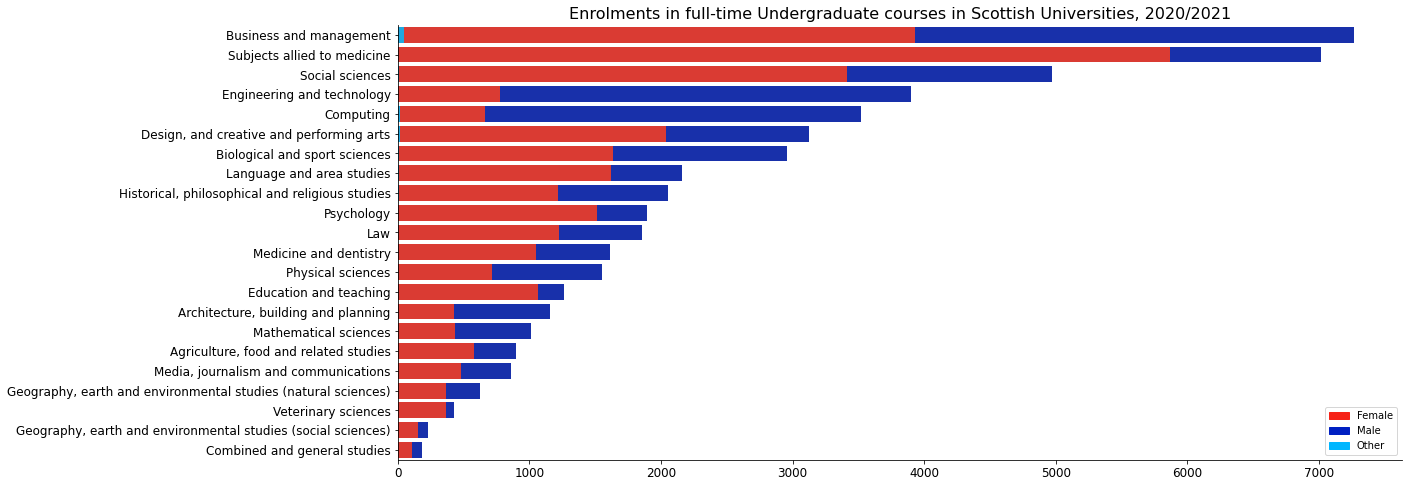

In [29]:
# Get subject list ordered by student enrolment
sort_ix = pivot.sort_values(by="Total", ascending = False)["cah_level_1"].unique()

male_color = "#0020C2"
female_color = "#F62217"
other_color = "#00b6ff"

ticks_size = 12

# Plot actual numbers of enrolment
plt.figure(figsize=(18,8))
t = sns.barplot(x="Total", y="cah_level_1", order = sort_ix, palette=[male_color], data=pivot)
f = sns.barplot(x="Female", y="cah_level_1", order = sort_ix, palette=[female_color], data=pivot)
o = sns.barplot(x="Other", y="cah_level_1", order = sort_ix, palette=[other_color], data=pivot)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

plt.title("Enrolments in full-time Undergraduate courses in Scottish Universities, 2020/2021", size=16)
plt.ylabel("")
plt.xlabel("")
plt.yticks(size=ticks_size)
plt.xticks(size=ticks_size)
sns.despine()
plt.show()

In [32]:
# Filter out "Total"
ft_ug_scotland_f_m_o = ft_ug_scotland[(ft_ug_scotland["sex"] != "Total")].copy()

# Calculate percentages of female enrolment per subject
total = ft_ug_scotland_f_m_o.groupby('cah_level_1')['number'].sum().reset_index()
female = ft_ug_scotland_f_m_o[ft_ug_scotland_f_m_o["sex"] =='Female'].groupby('cah_level_1')['number'].sum().reset_index()
other = ft_ug_scotland_f_m_o[ft_ug_scotland_f_m_o["sex"] == 'Other'].groupby('cah_level_1')['number'].sum().reset_index()

female['number'] = [i / j * 100 for i,j in zip(female['number'], total['number'])]
other['number'] = [i / j * 100 for i,j in zip(other['number'], total['number'])]
total['number'] = [i / j * 100 for i,j in zip(total['number'], total['number'])]
female.sort_values(by="number", ascending=False, inplace=True)
order_ug_ft = female["cah_level_1"]

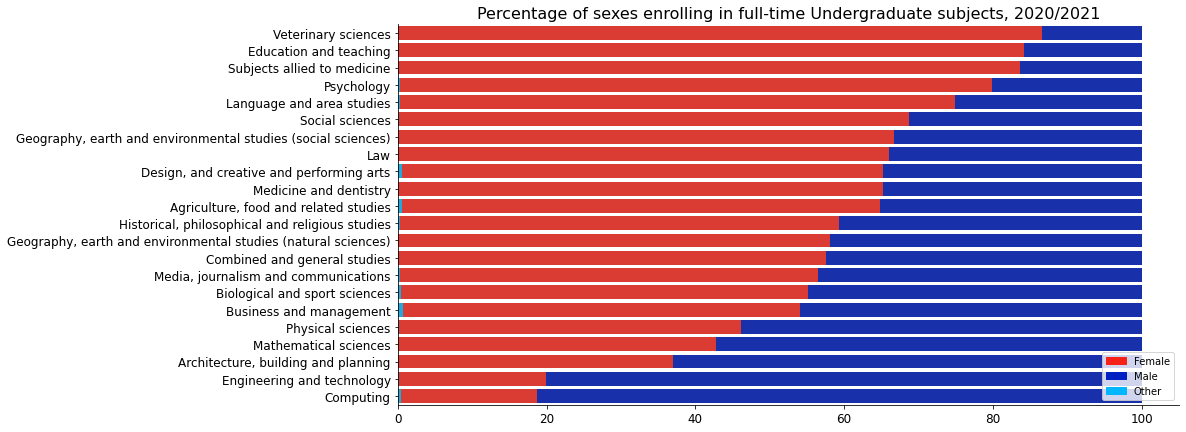

In [34]:
# set the figure size
plt.figure(figsize=(14, 7))

# bar chart 1 -> top bars (group of 'males')
bar1 = sns.barplot(x="number",  y="cah_level_1", data=total, order=female["cah_level_1"], color=male_color)

# bar chart 3 -> middle bars (group of 'females')
bar3 = sns.barplot(x="number", y="cah_level_1", data=female, order=female["cah_level_1"], color=female_color)

# bar chart 3 -> bottom bars (group of 'other')
bar2 = sns.barplot(x="number", y="cah_level_1", data=other, order=female["cah_level_1"], color=other_color)

# add legend
male_bar = mpatches.Patch(color=male_color, label='Male')
female_bar = mpatches.Patch(color=female_color, label='Female')
other_bar = mpatches.Patch(color=other_color, label='Other')
plt.legend(handles=[female_bar, male_bar, other_bar], loc='lower right')

# show the graph
plt.title("Percentage of sexes enrolling in full-time Undergraduate subjects, 2020/2021", size=16)
plt.xlabel("")
plt.xticks(size=ticks_size)
plt.ylabel("")
plt.yticks(size=ticks_size)
sns.despine()
plt.show()

Computing has the fifth largest number in enrolments, behind Engineering and techonology (4), Social sciences (3), Subjects allied to medicine (2), and Business and management (1). Despite this, females only make up 18.75% of total enrolments in Computing. Similarly, only 20.54% of students enrolling in Engineering and techonology were female.